Required Libraries

In [ ]:
# run this cell if below frameworks are not installed
!pip install xgboost
!pip install lightgbm

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings("ignore")
import csv

Load the dataset

In [ ]:
ds = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data2/iit kharagpur hackathon/Train_Data_Final.csv')

EDA (Exploratory Data Analysis)

In [ ]:
# size of the data
# total number of rows and columns
ds.shape

(8000, 16)

In [ ]:
# basic description of data
ds.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH,id
count,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000
mean,-39.616450,1051.229542,-152.15075,2.853485,911.693740,149.083150,810.813437,45.164963,1445.371906,979.734292,11.542394,-6.182181,4000.50000
std,81.895617,324.514858,150.07985,39.972683,339.978463,260.591289,321.352129,129.313917,455.400332,449.183717,41.830243,37.526459,2309.54541
min,-200.000000,-200.000000,-200.00000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,1.00000
25%,0.500000,917.000000,-200.00000,4.293956,726.750000,39.000000,651.937500,44.000000,1275.187500,709.937500,12.325000,0.779140,2000.75000
50%,1.500000,1051.250000,-200.00000,8.279845,910.625000,122.000000,806.750000,90.000000,1493.375000,942.000000,18.700000,1.031560,4000.50000
75%,2.600000,1225.000000,-200.00000,14.152558,1121.562500,259.175000,975.500000,125.000000,1697.750000,1253.437500,25.125000,1.358336,6000.25000
max,11.900000,2039.750000,1189.00000,63.741476,2214.000000,1479.000000,2682.750000,332.600000,2775.000000,2522.750000,44.600000,2.231036,8000.00000


In [ ]:
# information of data
ds.info

<bound method DataFrame.info of             Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0     2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1     2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2     2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3     2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4     2004-03-10  22:00:00     1.6      1272.25        51   6.518224   
...          ...       ...     ...          ...       ...        ...   
7995  2005-02-06  21:00:00     1.4       937.50      -200   3.667817   
7996  2005-02-06  22:00:00     1.1       896.25      -200   2.611733   
7997  2005-02-06  23:00:00     1.0       907.25      -200   2.415395   
7998  2005-02-07  00:00:00     1.1       902.25      -200   2.397211   
7999  2005-02-07  01:00:00     1.0       885.00      -200   1.975190   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0           1045.50    166.0       1056.25    113.0       1692.00   
1            954.75    103.0       1173.75     92.0       1558.75   
2            939.25    131.0       1140.00    114.0       1554.50   
3            948.25    172.0       1092.00    122.0       1583.75   
4            835.50    131.0       1205.00    116.0       1490.00   
...             ...      ...           ...      ...           ...   
7995         692.00    192.9        937.00    149.0        804.75   
7996         627.00    157.8       1033.25    126.3        781.50   
7997         613.75    149.8       1052.00    119.8        781.75   
7998         612.50    130.3       1049.25    109.5        776.75   
7999         582.25    104.3       1071.50     91.7        760.00   

      PT08.S5(O3)       T        AH            RH_type    id  
0         1267.50  13.600  0.757754              Ideal     1  
1          972.25  13.300  0.725487              Ideal     2  
2         1074.00  11.900  0.750239  Slightly Elevated     3  
3         1203.25  11.000  0.786713  Slightly Elevated     4  
4         1110.00  11.150  0.788794  Slightly Elevated     5  
...           ...     ...       ...                ...   ...  
7995       737.00   5.775  0.328561              Ideal  7996  
7996       610.00   5.375  0.330403              Ideal  7997  
7997       627.00   5.100  0.335822              Ideal  7998  
7998       565.75   4.825  0.330045              Ideal  7999  
7999       516.75   4.525  0.324868              Ideal  8000  

[8000 rows x 16 columns]>

In [ ]:
# columns in the data
ds.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'AH', 'RH_type', 'id'],
      dtype='object')

In [ ]:
# drop the specific column like the date, time and id
ds = ds.drop(columns=['Date', 'Time', 'id'], axis = 1)

Check for the null values

In [ ]:
# chcek for the null values in the data
ds.isnull().sum()

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
AH               0
RH_type          0
dtype: int64

In [ ]:
# create a dictonary where convert the categorical data into the numerical values
dict1 = {'Dry': 0,
         'Ideal': 1,
         'Slightly Elevated': 2,
         'Elevated': 3,
         'High': 4}

# create a list named output that will save the numerical values
output = []

# run the for loop and append the numerical values into the output list
for i in range(ds.shape[0]):
  output.append(dict1[ds['RH_type'][i]])

In [ ]:
# create an attribute or column in the ds data
ds['output'] = output

In [ ]:
# show all the redundant or the duplicate rows in the data
ds[ds.duplicated()]

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH,RH_type,output
1826,-200.0,-200.0,-200,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,Dry,0
1827,-200.0,-200.0,-200,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,Dry,0
1828,-200.0,-200.0,-200,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,Dry,0
1829,-200.0,-200.0,-200,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,Dry,0
1830,-200.0,-200.0,-200,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,Dry,0
1831,-200.0,-200.0,-200,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,Dry,0
1832,-200.0,-200.0,-200,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,Dry,0
1833,-200.0,-200.0,-200,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,Dry,0
1834,-200.0,-200.0,-200,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,Dry,0
1835,-200.0,-200.0,-200,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,Dry,0


In [ ]:
# drop all the duplicate rows from the ds data
ds = ds.drop_duplicates()

In [ ]:
# updated size of the ds data
ds.shape[0]

7970

In [ ]:
# create a variable that will store the ds column's output values
target = ds['output']

In [ ]:
# drop the RH_type and output column or attribute
ds = ds.drop(columns = ['RH_type', 'output'], axis = 1)

In [ ]:
# correlation method
correlation_matrix = ds.corr()

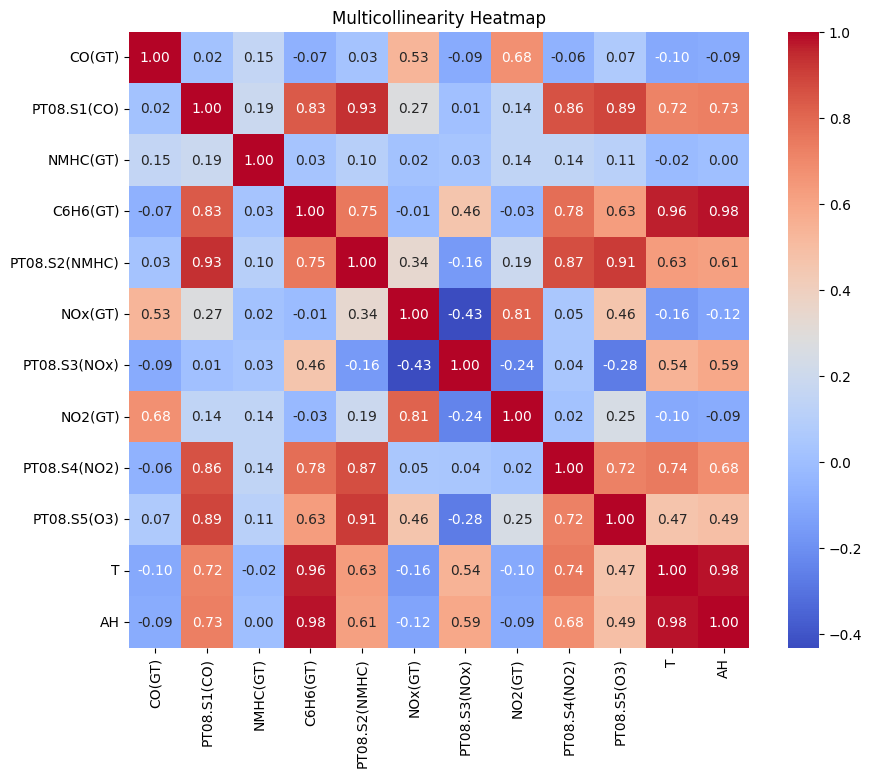

In [ ]:
# correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Multicollinearity Heatmap')
plt.show()

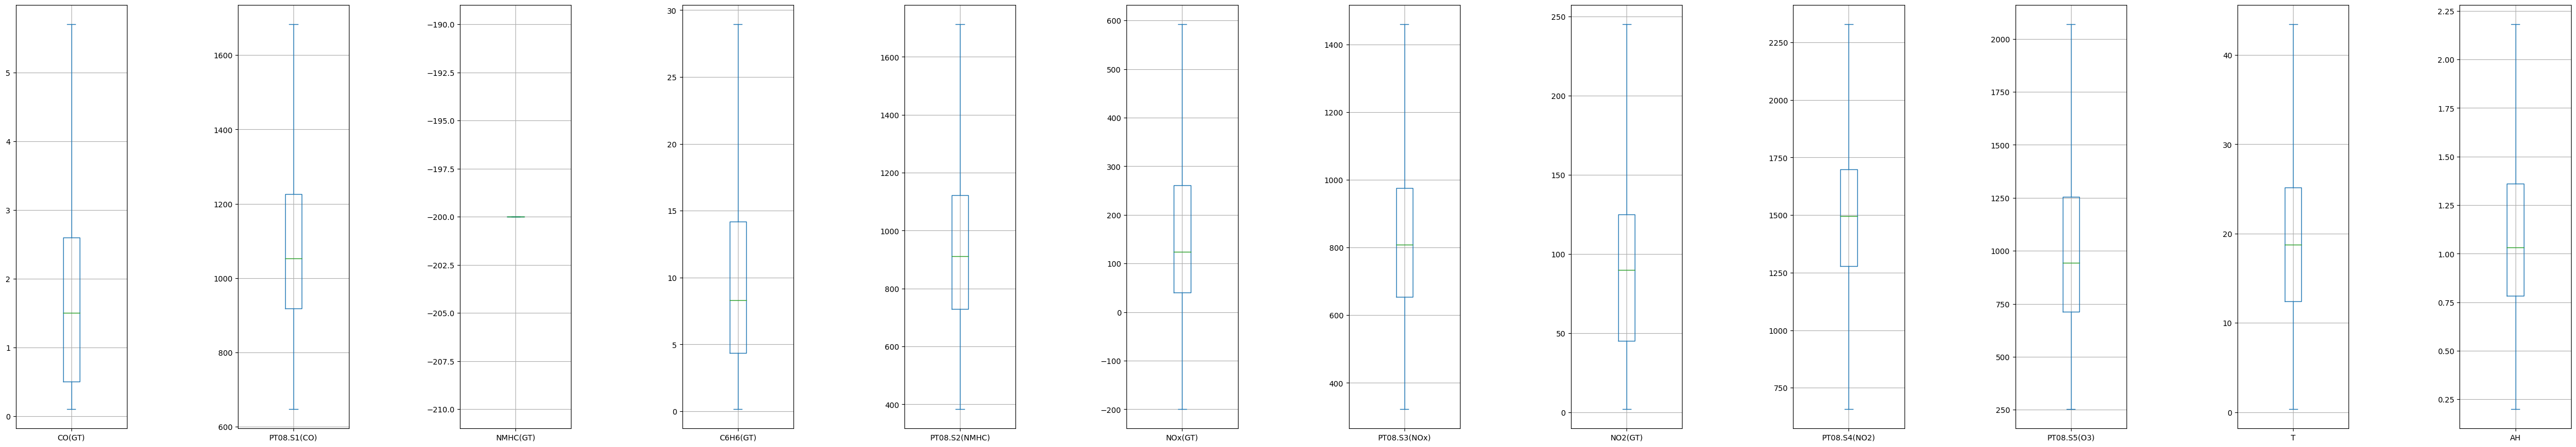

In [ ]:
# plot the box plot
plotting = ds[ds.columns]
plotting.plot(
    kind='box',
    subplots=True,
    sharey=False,
    showfliers=False,
    figsize=(60, 10),
    grid=0.5
)

# increase spacing between subplots
plt.subplots_adjust(wspace=1)
plt.show()

train test split the code

In [ ]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(ds, target, test_size=0.25, random_state=7)

In [ ]:
# size of the data
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5977, 12), (1993, 12), (5977,), (1993,))

In [ ]:
ml_name = []
accuracy_prec = []

Apply the ML models

Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.46193742680274386 0.4676367285499247
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.65      0.68       405
           1       0.45      0.74      0.56       649
           2       0.25      0.14      0.18       363
           3       0.32      0.22      0.26       306
           4       0.50      0.26      0.34       270

    accuracy                           0.47      1993
   macro avg       0.45      0.40      0.40      1993
weighted avg       0.45      0.47      0.44      1993



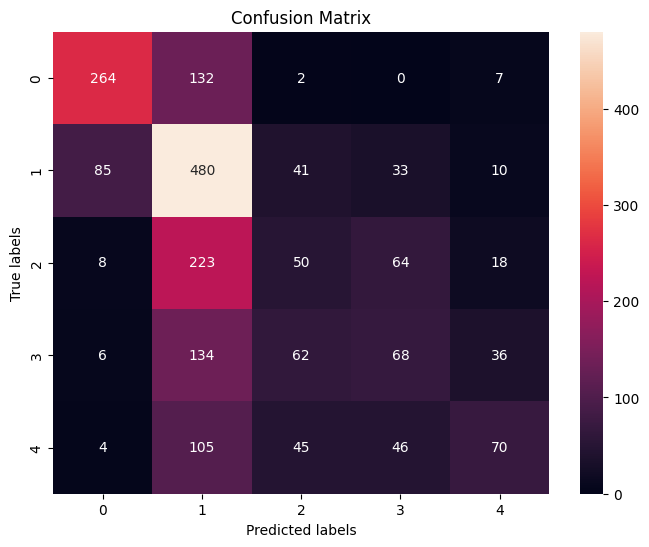

In [ ]:
logclassifier = LogisticRegression(random_state = 0)
logclassifier.fit(x_train, y_train)
x_train_predict_log = logclassifier.predict(x_train)
log_train_accuracy = accuracy_score(x_train_predict_log, y_train)
x_test_predict_log = logclassifier.predict(x_test)
log_test_accuracy = accuracy_score(x_test_predict_log, y_test)
print(log_train_accuracy, log_test_accuracy)

print("Classification Report:")
print(classification_report(y_test, x_test_predict_log))

# Calculate confusion matrix
cm = confusion_matrix(y_test, x_test_predict_log)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

ml_name.append('Log reg')
accuracy_prec.append(log_test_accuracy)

KNN classifier

0.6116780993809603 0.5313597591570497
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       405
           1       0.52      0.71      0.60       649
           2       0.37      0.29      0.32       363
           3       0.40      0.37      0.38       306
           4       0.60      0.39      0.48       270

    accuracy                           0.53      1993
   macro avg       0.53      0.49      0.50      1993
weighted avg       0.53      0.53      0.52      1993



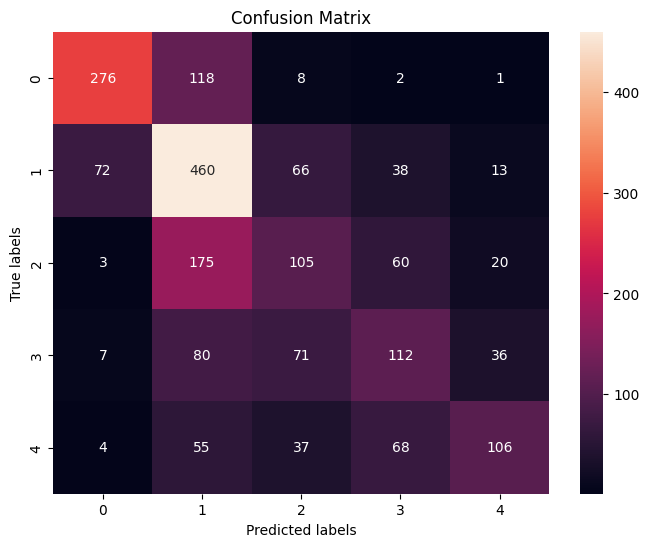

In [ ]:
knnclassifier = KNeighborsClassifier(n_neighbors=15)
knnclassifier.fit(x_train, y_train)
x_train_predict_knn = knnclassifier.predict(x_train)
knn_train_accuracy = accuracy_score(x_train_predict_knn, y_train)
x_test_predict_knn = knnclassifier.predict(x_test)
knn_test_accuracy = accuracy_score(x_test_predict_knn, y_test)
print(knn_train_accuracy, knn_test_accuracy)


print("Classification Report:")
print(classification_report(y_test, x_test_predict_knn))

# Calculate confusion matrix
cm = confusion_matrix(y_test, x_test_predict_knn)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

ml_name.append('KNN')
accuracy_prec.append(knn_test_accuracy)

Naive bayes classifier

0.4209469633595449 0.39839438033115904
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.15      0.25       405
           1       0.39      0.84      0.53       649
           2       0.27      0.09      0.14       363
           3       0.34      0.14      0.20       306
           4       0.44      0.43      0.43       270

    accuracy                           0.40      1993
   macro avg       0.45      0.33      0.31      1993
weighted avg       0.46      0.40      0.34      1993



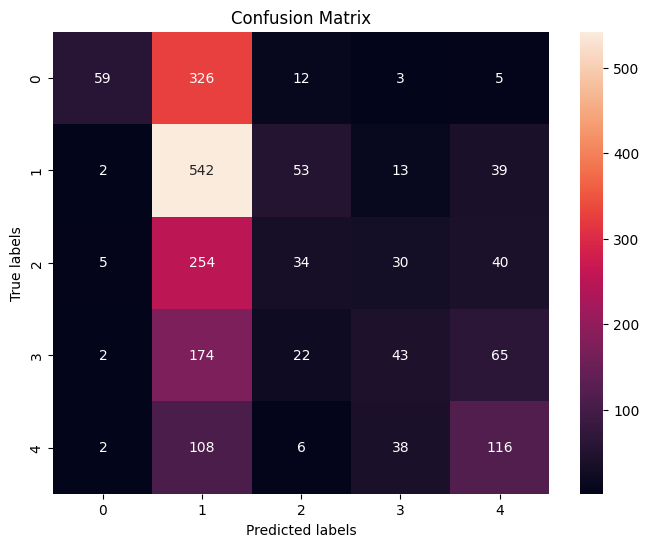

In [ ]:
naivebayes = GaussianNB()
naivebayes.fit(x_train, y_train)
x_train_predict_nb = naivebayes.predict(x_train)
nb_train_accuracy = accuracy_score(x_train_predict_nb, y_train)
x_test_predict_nb = naivebayes.predict(x_test)
nb_test_accuracy = accuracy_score(x_test_predict_nb, y_test)
print(nb_train_accuracy, nb_test_accuracy)

print("Classification Report:")
print(classification_report(y_test, x_test_predict_nb))

# Calculate confusion matrix
cm = confusion_matrix(y_test, x_test_predict_nb)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

ml_name.append('NB')
accuracy_prec.append(nb_test_accuracy)

standardize the data using standard scaler

In [ ]:
st_x = StandardScaler()
x_train_ss = st_x.fit_transform(x_train)
x_test_ss = st_x.transform(x_test)

SVM classifier

Training Accuracy: 0.6541743349506441
Testing Accuracy: 0.6482689412945308
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       405
           1       0.71      0.83      0.76       649
           2       0.42      0.46      0.44       363
           3       0.43      0.38      0.40       306
           4       0.67      0.49      0.57       270

    accuracy                           0.65      1993
   macro avg       0.63      0.60      0.61      1993
weighted avg       0.65      0.65      0.65      1993



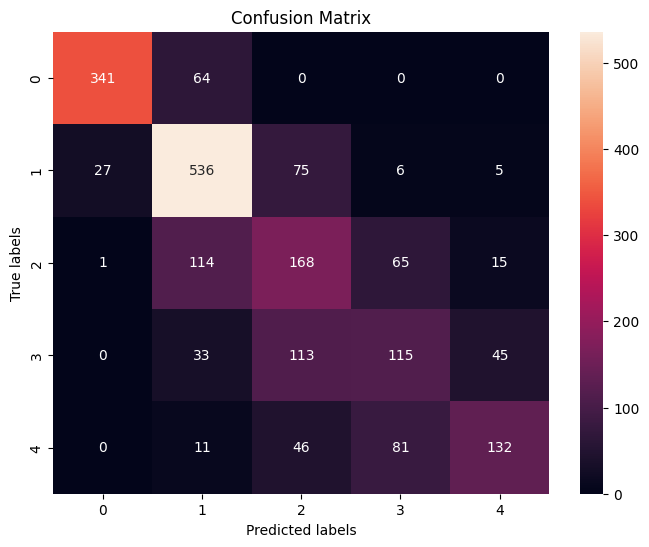

In [ ]:
# Create and train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(x_train_ss, y_train)

# Predictions
y_train_pred = svm_model.predict(x_train_ss)
y_test_pred = svm_model.predict(x_test_ss)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

ml_name.append('SVM')
accuracy_prec.append(test_accuracy)

Decision Tree Classifier

1.0 0.946312092323131
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       405
           1       0.96      0.96      0.96       649
           2       0.93      0.93      0.93       363
           3       0.92      0.92      0.92       306
           4       0.96      0.95      0.95       270

    accuracy                           0.95      1993
   macro avg       0.94      0.94      0.94      1993
weighted avg       0.95      0.95      0.95      1993



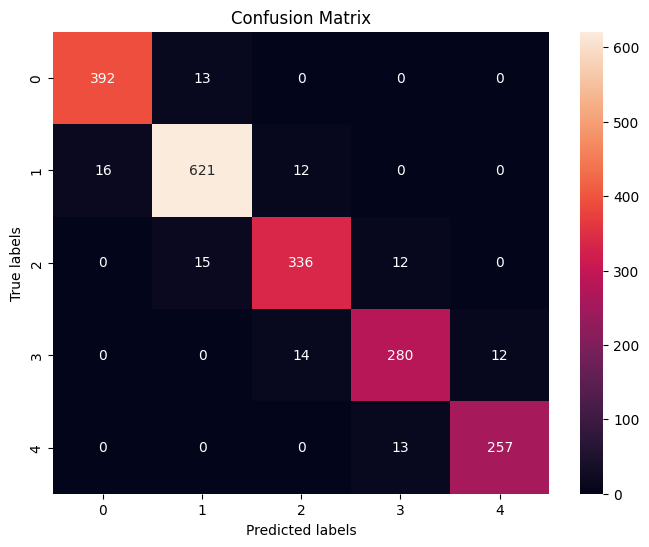

In [ ]:
decisiontreeclassifier = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
decisiontreeclassifier.fit(x_train, y_train)
x_train_predict_decision = decisiontreeclassifier.predict(x_train)
decision_train_accuracy = accuracy_score(x_train_predict_decision, y_train)
x_test_predict_decision = decisiontreeclassifier.predict(x_test)
decision_test_accuracy = accuracy_score(x_test_predict_decision, y_test)
print(decision_train_accuracy, decision_test_accuracy)

print("Classification Report:")
print(classification_report(y_test, x_test_predict_decision))

# Calculate confusion matrix
cm = confusion_matrix(y_test, x_test_predict_decision)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

ml_name.append('Decision tree')
accuracy_prec.append(decision_test_accuracy)

Random Forest Classifier

0.9996653839718923 0.8148519819367788
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       405
           1       0.84      0.92      0.88       649
           2       0.71      0.69      0.70       363
           3       0.66      0.68      0.67       306
           4       0.86      0.76      0.80       270

    accuracy                           0.81      1993
   macro avg       0.81      0.79      0.80      1993
weighted avg       0.82      0.81      0.81      1993



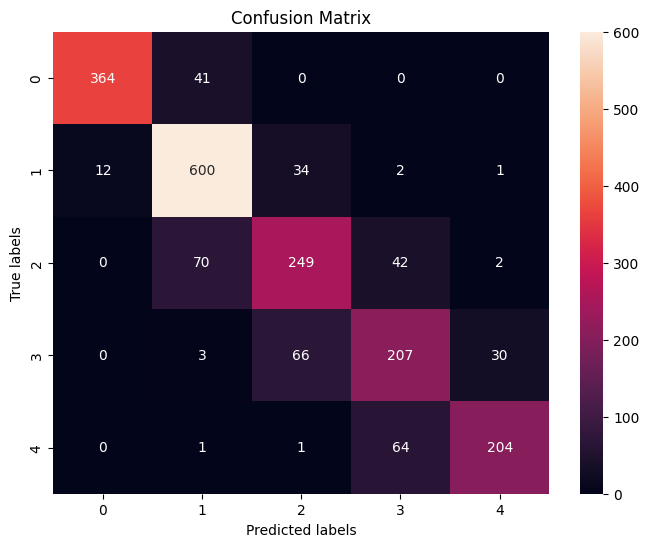

In [ ]:
randomforest = RandomForestClassifier(random_state=42, max_depth=51,
                                       n_estimators=25)

randomforest.fit(x_train, y_train)
x_train_predict_rf = randomforest.predict(x_train)
rf_train_accuracy = accuracy_score(x_train_predict_rf, y_train)
x_test_predict_rf = randomforest.predict(x_test)
rf_test_accuracy = accuracy_score(x_test_predict_rf, y_test)
print(rf_train_accuracy, rf_test_accuracy)

print("Classification Report:")
print(classification_report(y_test, x_test_predict_rf))

# Calculate confusion matrix
cm = confusion_matrix(y_test, x_test_predict_rf)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

ml_name.append('Random Forest')
accuracy_prec.append(rf_test_accuracy)

XG Boost Classifier

Training Accuracy: 1.0
Testing Accuracy: 0.9548419468138485
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       405
           1       0.96      0.97      0.96       649
           2       0.93      0.93      0.93       363
           3       0.93      0.93      0.93       306
           4       0.97      0.95      0.96       270

    accuracy                           0.95      1993
   macro avg       0.95      0.95      0.95      1993
weighted avg       0.95      0.95      0.95      1993



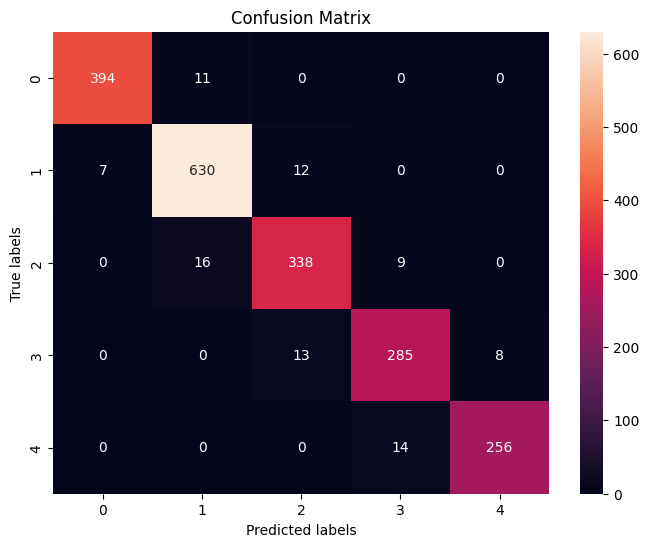

In [ ]:
# Create and train the XGBoost model
modelxgb = xgb.XGBClassifier()  # For multiclass classification
modelxgb.fit(x_train, y_train)

# Predictions
xgb_train_pred = modelxgb.predict(x_train)
xgb_test_pred = modelxgb.predict(x_test)

# Evaluate the model
xgb_train_accuracy = (xgb_train_pred == y_train).mean()
xgb_test_accuracy = (xgb_test_pred == y_test).mean()
print("Training Accuracy:", xgb_train_accuracy)
print("Testing Accuracy:", xgb_test_accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, xgb_test_pred))

# Calculate confusion matrix
cm = confusion_matrix(y_test, xgb_test_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

ml_name.append('xgb')
accuracy_prec.append(xgb_test_accuracy)

Light Boost Classifier

Training Accuracy: 1.0
Testing Accuracy: 0.9578524836929252
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       405
           1       0.96      0.97      0.96       649
           2       0.93      0.94      0.94       363
           3       0.93      0.95      0.94       306
           4       0.98      0.94      0.96       270

    accuracy                           0.96      1993
   macro avg       0.96      0.96      0.96      1993
weighted avg       0.96      0.96      0.96      1993



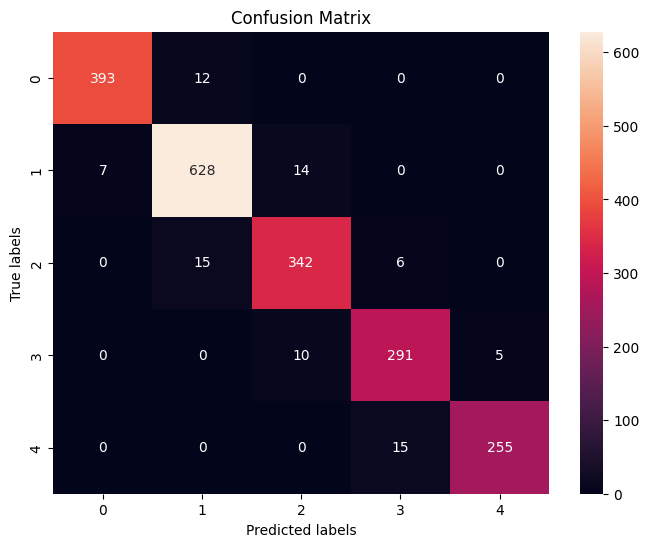

In [ ]:
train_data = lgb.Dataset(x_train, label=y_train)
test_data = lgb.Dataset(x_test, label=y_test)
# Create and train the LightGBM model
params = {
    'objective': 'multiclass',
    'num_class': 5,
    'metric': 'multi_logloss',
    'verbosity': -1
}
model = lgb.train(params, train_data)

# Predictions
y_train_pred = model.predict(x_train).argmax(axis=1)
y_test_pred = model.predict(x_test).argmax(axis=1)

# Evaluate the model
train_accuracy = (y_train_pred == y_train).mean()
test_accuracy = (y_test_pred == y_test).mean()
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

ml_name.append('Light boost')
accuracy_prec.append(test_accuracy)

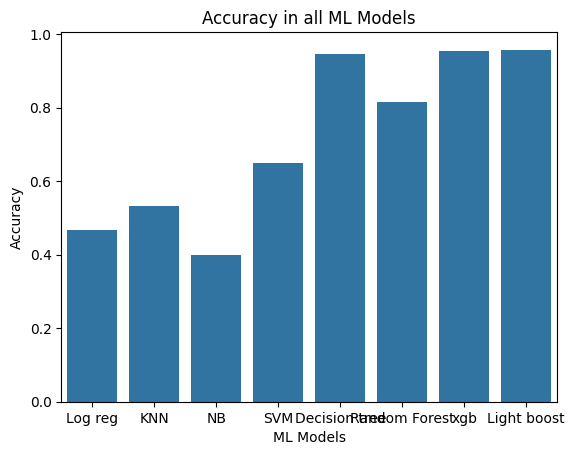

In [ ]:
# Create bar plot for all the ml models
sns.barplot(x=ml_name, y=accuracy_prec)
plt.title("Accuracy in all ML Models")
plt.xlabel("ML Models")
plt.ylabel("Accuracy")
plt.show()

#### We will choose the light boost as it is giving us the highest accuracy

Load the test dataset

In [ ]:
# load the test data
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data2/iit kharagpur hackathon/Test_Data.csv")

In [ ]:
# length of the test data
leng = test_data.shape[0]
leng

1357

In [ ]:
# create the dictionary that will convert the numerical values into the categorical data
RH_dict = {0: 'Dry', 1: 'Ideal', 2: 'Slightly Elevated', 3: 'Elevated', 4: 'High'}

# create the empty list that will store the values for csv files
RH_list = []

# run the for loop til the length of leng
for i in range(leng):
  # insert values in input_data variable
  input_data = (test_data['CO(GT)'][i],test_data['PT08.S1(CO)'][i],test_data['NMHC(GT)'][i]
                ,test_data['C6H6(GT)'][i],test_data['PT08.S2(NMHC)'][i],test_data['NOx(GT)'][i]
                ,test_data['PT08.S3(NOx)'][i],test_data['NO2(GT)'][i],test_data['PT08.S4(NO2)'][i]
                ,test_data['PT08.S5(O3)'][i], test_data['T'][i],test_data['AH'][i])
  #changing the input to the  numpy array
  input_data_as_numpy_array = np.asarray(input_data)

  #reshape the arrays we ar predicting for one instance
  input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

  #predict the values
  prediction  = randomforest.predict(input_data_reshaped)

  # append the values
  RH_list.append({'':i, 'id': test_data['id'][i], 'RH_type': RH_dict[prediction[0]]})

In [ ]:
# show the values in the RH_list list
RH_list

[{'': 0, 'id': 1, 'RH_type': 'Ideal'},
 {'': 1, 'id': 2, 'RH_type': 'Ideal'},
 {'': 2, 'id': 3, 'RH_type': 'Ideal'},
 {'': 3, 'id': 4, 'RH_type': 'Ideal'},
 {'': 4, 'id': 5, 'RH_type': 'Ideal'},
 {'': 5, 'id': 6, 'RH_type': 'Ideal'},
 {'': 6, 'id': 7, 'RH_type': 'Ideal'},
 {'': 7, 'id': 8, 'RH_type': 'Ideal'},
 {'': 8, 'id': 9, 'RH_type': 'Ideal'},
 {'': 9, 'id': 10, 'RH_type': 'Ideal'},
 {'': 10, 'id': 11, 'RH_type': 'Dry'},
 {'': 11, 'id': 12, 'RH_type': 'Ideal'},
 {'': 12, 'id': 13, 'RH_type': 'Ideal'},
 {'': 13, 'id': 14, 'RH_type': 'Ideal'},
 {'': 14, 'id': 15, 'RH_type': 'Ideal'},
 {'': 15, 'id': 16, 'RH_type': 'Ideal'},
 {'': 16, 'id': 17, 'RH_type': 'Ideal'},
 {'': 17, 'id': 18, 'RH_type': 'Ideal'},
 {'': 18, 'id': 19, 'RH_type': 'Ideal'},
 {'': 19, 'id': 20, 'RH_type': 'Ideal'},
 {'': 20, 'id': 21, 'RH_type': 'Ideal'},
 {'': 21, 'id': 22, 'RH_type': 'Ideal'},
 {'': 22, 'id': 23, 'RH_type': 'Ideal'},
 {'': 23, 'id': 24, 'RH_type': 'Ideal'},
 {'': 24, 'id': 25, 'RH_type': 'Ideal

create the csv file

In [ ]:
# create the list named fields that will store the column names
fields = ['','id', 'RH_type']

# filename is stored in the variable filename
filename = "Harshal_jain output"

# create the file and then open it
with open(filename, 'w') as csvfile:
  writer = csv.DictWriter(csvfile, fieldnames=fields)
  writer.writeheader()
  writer.writerows(RH_list)